# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')
print(heroes_df.head())
print(powers_df.head())

   Unnamed: 0         name Gender Eye color               Race Hair color  \
0           0       A-Bomb   Male    yellow              Human    No Hair   
1           1   Abe Sapien   Male      blue      Icthyo Sapien    No Hair   
2           2     Abin Sur   Male      blue            Ungaran    No Hair   
3           3  Abomination   Male     green  Human / Radiation    No Hair   
4           4      Abraxas   Male      blue      Cosmic Entity      Black   

   Height          Publisher Skin color Alignment  Weight  
0   203.0      Marvel Comics          -      good   441.0  
1   191.0  Dark Horse Comics       blue      good    65.0  
2   185.0          DC Comics        red      good    90.0  
3   203.0      Marvel Comics          -       bad   441.0  
4   -99.0      Marvel Comics          -       bad   -99.0  
    hero_names  Agility  Accelerated Healing  Lantern Power Ring  \
0      3-D Man     True                False               False   
1       A-Bomb    False                 T

It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [3]:
heroes_df = heroes_df.drop(['Unnamed: 0'], axis=1)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [4]:
print(heroes_df.describe())

           Height      Weight
count  734.000000  732.000000
mean   102.254087   43.855191
std    139.624543  130.823733
min    -99.000000  -99.000000
25%    -99.000000  -99.000000
50%    175.000000   62.000000
75%    185.000000   90.000000
max    975.000000  900.000000


In [5]:
print(powers_df.describe())

          hero_names Agility Accelerated Healing Lantern Power Ring  \
count            667     667                 667                667   
unique           667       2                   2                  2   
top     Black Abbott   False               False              False   
freq               1     425                 489                656   

       Dimensional Awareness Cold Resistance Durability Stealth  \
count                    667             667        667     667   
unique                     2               2          2       2   
top                    False           False      False   False   
freq                     642             620        410     541   

       Energy Absorption Flight Danger Sense Underwater breathing  \
count                667    667          667                  667   
unique                 2      2            2                    2   
top                False  False        False                False   
freq                 590    455 

## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________

To find the Nan entries, use the .isna() function.  For the categorical data, figuring out what the unique entries are.


In [6]:
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [7]:
powers_df.isna().sum()

hero_names                      0
Agility                         0
Accelerated Healing             0
Lantern Power Ring              0
Dimensional Awareness           0
Cold Resistance                 0
Durability                      0
Stealth                         0
Energy Absorption               0
Flight                          0
Danger Sense                    0
Underwater breathing            0
Marksmanship                    0
Weapons Master                  0
Power Augmentation              0
Animal Attributes               0
Longevity                       0
Intelligence                    0
Super Strength                  0
Cryokinesis                     0
Telepathy                       0
Energy Armor                    0
Energy Blasts                   0
Duplication                     0
Size Changing                   0
Density Control                 0
Stamina                         0
Astral Travel                   0
Audio Control                   0
Dexterity     

In [8]:
heroes_df['Publisher'].value_counts()

Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
Image Comics          14
George Lucas          14
HarperCollins          6
Star Trek              6
Team Epic TV           5
SyFy                   5
Shueisha               4
ABC Studios            4
Icon Comics            4
IDW Publishing         4
Wildstorm              3
Sony Pictures          2
Hanna-Barbera          1
South Park             1
J. K. Rowling          1
Universal Studios      1
J. R. R. Tolkien       1
Microsoft              1
Titan Books            1
Rebellion              1
Name: Publisher, dtype: int64

In [9]:
heroes_df['Skin color'].value_counts()
#'-' is the missing entries

-                 662
green              21
blue                9
red                 9
white               7
silver              5
grey                5
gold                3
purple              3
pink                2
yellow              2
black               1
red / black         1
orange              1
orange / white      1
gray                1
blue-white          1
Name: Skin color, dtype: int64

In [10]:
heroes_df['Publisher'].unique()
#'nan' is the missing data

array(['Marvel Comics', 'Dark Horse Comics', 'DC Comics', 'NBC - Heroes',
       'Wildstorm', 'Image Comics', nan, 'Icon Comics', 'SyFy',
       'Hanna-Barbera', 'George Lucas', 'Team Epic TV', 'South Park',
       'HarperCollins', 'ABC Studios', 'Universal Studios', 'Star Trek',
       'IDW Publishing', 'Shueisha', 'Sony Pictures', 'J. K. Rowling',
       'Titan Books', 'Rebellion', 'Microsoft', 'J. R. R. Tolkien'],
      dtype=object)

In [11]:
heroes_df['Weight'].value_counts()

-99.0     237
 79.0      23
 54.0      23
 81.0      22
 90.0      19
 52.0      15
 86.0      15
 59.0      14
 56.0      13
 77.0      13
 61.0      13
 101.0     12
 50.0      12
 88.0      11
 63.0      11
 83.0      10
 95.0      10
 74.0      10
 65.0       9
 72.0       8
 68.0       8
 104.0      8
 135.0      8
 57.0       7
 97.0       7
 99.0       7
 117.0      6
 108.0      6
 55.0       5
 70.0       5
 158.0      5
 58.0       5
 203.0      4
 146.0      4
 225.0      4
 113.0      4
 191.0      4
 91.0       3
 62.0       3
 18.0       3
 110.0      3
 89.0       3
 67.0       3
 92.0       3
 71.0       3
 171.0      3
 630.0      3
 106.0      3
 288.0      3
 80.0       2
 85.0       2
 230.0      2
 122.0      2
 180.0      2
 49.0       2
 441.0      2
 270.0      2
 405.0      2
 173.0      2
 87.0       2
 383.0      2
 149.0      2
 437.0      1
 443.0      1
 358.0      1
 126.0      1
 169.0      1
 331.0      1
 69.0       1
 293.0      1
 98.0       1
 817.0

In [12]:
heroes_df['Weight'].unique()
#'nan' is once again the missing data

array([441.,  65.,  90., -99., 122.,  88.,  61.,  81., 104., 108.,  72.,
       169., 173., 101.,  68.,  57.,  54.,  83.,  86., 358., 135., 106.,
       146.,  63.,  98., 270.,  59.,  50., 126.,  67., 180.,  77.,  52.,
        95.,  79., 133., 181., 216.,  71., 124., 155., 113.,  58.,  92.,
        97.,  56., 230., 495.,  55., 110.,  99., 158.,  74., 116.,  62.,
       170.,  70.,  78., 225., 817.,  27.,  91., 178., 383., 171., 187.,
       132.,  89., 412., 306.,  80., 203.,  96.,  18.,  45., 167.,  16.,
       630., 268.,  nan, 115.,   4.,  48., 119., 207., 191.,   2.,  14.,
        49., 855., 356., 324., 360., 288., 236.,  36., 140., 128., 338.,
       248., 125.,  85., 293.,  69., 405., 117.,  87., 234., 320.,  38.,
        25., 900., 310., 149., 315., 153., 437., 131.,  47., 176., 198.,
       443., 143.,  76.,  82., 105., 331., 214.,  73., 334.,  41., 162.,
        39., 473.,  51.,  17.])

In [13]:
weight_mean = heroes_df['Weight'].mean()
heroes_df['Weight'].fillna(weight_mean, inplace=True)
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         0
dtype: int64

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [14]:
powers_df.isna().any()
powers_df.isna().any().any()

False

In [15]:
heroes_df.drop_duplicates(subset='name', inplace=True)
heroes_df.reset_index(drop=True, inplace=True)

In [16]:
powers_df.rename(columns={'hero names': 'name'}, inplace=True)

In [17]:
powers_df.astype('str')

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [18]:
heroes_and_powers_df = powers_df.join(heroes_df, how='inner')
heroes_and_powers_df.reset_index()
heroes_and_powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,3-D Man,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,A-Bomb,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True

In [19]:
heroes_and_powers_df.columns

Index(['hero_names', 'Agility', 'Accelerated Healing', 'Lantern Power Ring',
       'Dimensional Awareness', 'Cold Resistance', 'Durability', 'Stealth',
       'Energy Absorption', 'Flight',
       ...
       'name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height',
       'Publisher', 'Skin color', 'Alignment', 'Weight'],
      dtype='object', length=178)

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

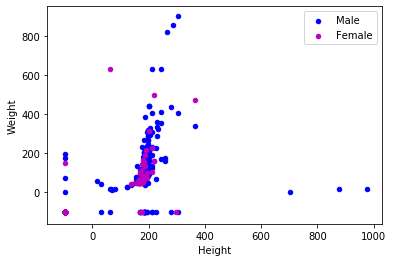

In [20]:
male_heroes = heroes_df[heroes_df['Gender']=='Male']
female_heroes = heroes_df[heroes_df['Gender']=='Female']

ax = male_heroes.plot.scatter(x='Height', y='Weight', c='b', label='Male')
female_heroes.plot.scatter(x='Height', y='Weight', c='m', label='Female', ax=ax)

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [21]:
male_heroes_df = heroes_df[heroes_df['Gender']=='Male']
female_heroes_df = heroes_df[heroes_df['Gender']=='Female']

def show_distplot(dataframe, gender, column_name):
    plt.plot()
    dataframe[column_name].hist()
    plt.title('Distribution for {} and {} heroes'.format(column_name, gender))
    plt.xlabel(column_name)
    plt.ylabel('Probability Density')
    plt.show()

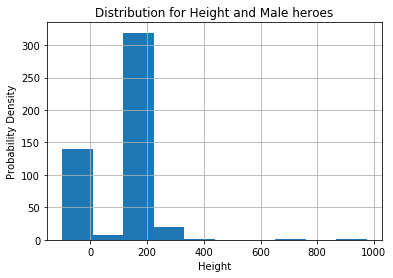

109.11201629327903
180.0
144.07788723467561
0   -99.0
dtype: float64


In [22]:
# Male Height
show_distplot(male_heroes_df, 'Male', 'Height')
print(male_heroes_df['Height'].mean())
print(male_heroes_df['Height'].median())
print(male_heroes_df['Height'].std())
print(male_heroes_df['Height'].mode())

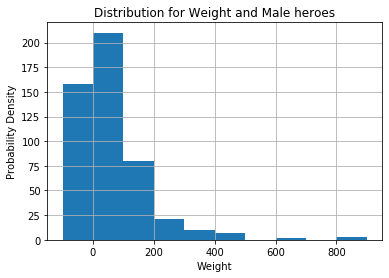

53.519053342681936
79.0
139.7373873983421
0   -99.0
dtype: float64


In [23]:
# Male Weight
show_distplot(male_heroes_df, 'Male', 'Weight')
print(male_heroes_df['Weight'].mean())
print(male_heroes_df['Weight'].median())
print(male_heroes_df['Weight'].std())
print(male_heroes_df['Weight'].mode())

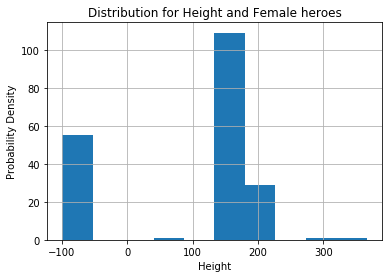

97.99234693877551
168.0
125.00240486959272
0   -99.0
dtype: float64


In [24]:
# Female Height
show_distplot(female_heroes_df, 'Female', 'Height')
print(female_heroes_df['Height'].mean())
print(female_heroes_df['Height'].median())
print(female_heroes_df['Height'].std())
print(female_heroes_df['Height'].mode())

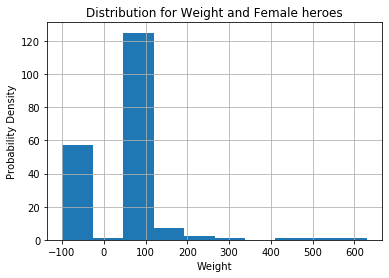

27.433673469387756
54.0
104.24311175066705
0   -99.0
dtype: float64


In [25]:
# Female Weight
show_distplot(female_heroes_df, 'Female', 'Weight')
print(female_heroes_df['Weight'].mean())
print(female_heroes_df['Weight'].median())
print(female_heroes_df['Weight'].std())
print(female_heroes_df['Weight'].mode())

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________
Interestingly enough, every distribution is skewed left as every mean is less than the median.  The spread is fairly large with each standard deviation being greater than 100.  There are missing values that I should deal with because the mode for each is 0 and -99 which doesn't make sense therefore it must be missing data.


### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [26]:
powers_count=heroes_and_powers_df.iloc[0:667,1:168].sum()
powers_count.sort_values(ascending=False)
#top 5 powers Super Strength, Stamina, Durability, Super Speed, Agility

Super Strength                  360
Stamina                         289
Durability                      257
Super Speed                     249
Agility                         242
Flight                          212
Accelerated Healing             178
Reflexes                        164
Intelligence                    158
Energy Blasts                   147
Stealth                         126
Marksmanship                    119
Invulnerability                 117
Longevity                       113
Weapons Master                  105
Telepathy                        92
Enhanced Senses                  89
Force Fields                     86
Energy Absorption                77
Enhanced Hearing                 72
Teleportation                    72
Immortality                      69
Shapeshifting                    66
Jump                             65
Telekinesis                      61
Natural Weapons                  58
Weapon-based Powers              58
Size Changing               

In [27]:
publisher_sum = heroes_and_powers_df.groupby(['Publisher']).sum()
publisher_sum

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Height,Weight
Publisher,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ABC Studios,2.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-396.0,-396.0
DC Comics,74.0,54.0,5.0,10.0,21.0,82.0,39.0,16.0,70.0,6.0,7.0,35.0,31.0,2.0,5.0,37.0,46.0,104.0,5.0,27.0,3.0,35.0,6.0,19.0,5.0,93.0,2.0,1.0,1.0,0.0,72.0,2.0,10.0,18.0,3.0,5.0,2.0,24.0,26.0,18.0,15.0,13.0,0.0,14.0,0.0,8.0,2.0,21.0,7.0,17.0,7.0,0.0,10.0,12.0,0.0,14.0,1.0,2.0,11.0,57.0,36.0,13.0,27.0,8.0,0.0,4.0,0.0,2.0,12.0,3.0,4.0,2.0,5.0,2.0,0.0,2.0,6.0,6.0,5.0,3.0,22.0,0.0,1.0,8.0,4.0,11.0,9.0,8.0,12.0,9.0,2.0,3.0,8.0,2.0,5.0,4.0,11.0,5.0,0.0,6.0,3.0,1.0,16.0,20.0,10.0,10.0,9.0,14.0,0.0,0.0,2.0,3.0,0.0,1.0,1.0,0.0,4.0,3.0,14.0,15.0,0.0,2.0,15.0,2.0,7.0,2.0,4.0,3.0,3.0,2.0,2.0,7.0,4.0,1.0,6.0,6.0,3.0,0.0,10.0,0.0,0.0,8.0,11.0,12.0,11.0,1.0,2.0,1.0,4.0,0.0,8.

In [28]:
dc_top = publisher_sum.iloc[1, 0:167].sort_values(ascending=False)
print(dc_top)
#DC top five powers Super Strength, Stamina, Durability, Agility, Super Speed

Super Strength                  104.0
Stamina                          93.0
Durability                       82.0
Agility                          74.0
Super Speed                      72.0
Flight                           70.0
Reflexes                         57.0
Accelerated Healing              54.0
Intelligence                     46.0
Stealth                          39.0
Longevity                        37.0
Invulnerability                  36.0
Marksmanship                     35.0
Energy Blasts                    35.0
Weapons Master                   31.0
Force Fields                     27.0
Telepathy                        27.0
Enhanced Senses                  26.0
Teleportation                    24.0
Enhanced Hearing                 22.0
Cold Resistance                  21.0
Shapeshifting                    21.0
Heat Resistance                  20.0
Size Changing                    19.0
Weapon-based Powers              18.0
Telekinesis                      18.0
Immortality 

In [29]:
marvel_top = publisher_sum.iloc[-13, 0:167].sort_values(ascending=False)
print(marvel_top)
#Marvel top powers Super Strength, Stamina, Durability, Super Speed, Agility

Super Strength                  186.0
Stamina                         152.0
Super Speed                     127.0
Durability                      127.0
Agility                         126.0
Flight                          102.0
Accelerated Healing              91.0
Intelligence                     88.0
Reflexes                         81.0
Energy Blasts                    77.0
Invulnerability                  68.0
Stealth                          68.0
Marksmanship                     61.0
Weapons Master                   54.0
Longevity                        53.0
Energy Absorption                49.0
Telepathy                        44.0
Enhanced Senses                  44.0
Force Fields                     43.0
Enhanced Hearing                 42.0
Immortality                      41.0
Teleportation                    39.0
Jump                             36.0
Telekinesis                      33.0
Natural Weapons                  33.0
Shapeshifting                    33.0
Energy Manip

In [30]:
original_powers_df = pd.read_csv('super_hero_powers.csv')
original_powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [31]:
count_dict = {}
for column in original_powers_df:
    if original_powers_df[column].dtype == bool:
        count_dict[column] = original_powers_df[column].sum()

In [32]:
#What are the five most common powers?
count_df = pd.DataFrame(count_dict, index = ['Counts'])
count_df = count_df.T

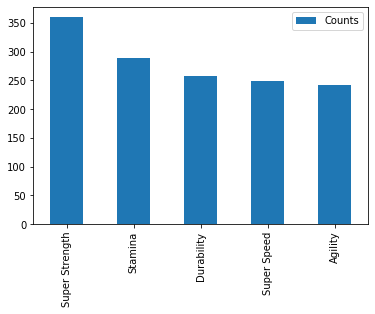

In [33]:
count_df.sort_values('Counts', ascending=False).head().plot(kind='bar')

In [34]:
#What are the 5 most common powers in the Marvel Universe?
joined_df = original_powers_df.join(heroes_df, how='inner')

marvel_df = joined_df[joined_df['Publisher']=='Marvel Comics']

marvel_dict = {}
for column in marvel_df.columns:
    if marvel_df[column].dtype == bool:
        marvel_dict[column] = marvel_df[column].sum()
        

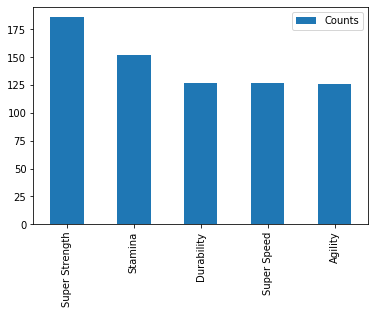

In [35]:
marvel_counts_df = pd.DataFrame(marvel_dict, index=['Counts'])
marvel_counts_df = marvel_counts_df.T
marvel_counts_df.sort_values('Counts', ascending=False).head().plot(kind='bar')

In [36]:
#What are the 5 most common powers in the DC Universe?
dc_df = joined_df[joined_df['Publisher']=='DC Comics']

dc_dict = {}
for column in dc_df.columns:
    if dc_df[column].dtype == bool:
        dc_dict[column] = dc_df[column].sum()

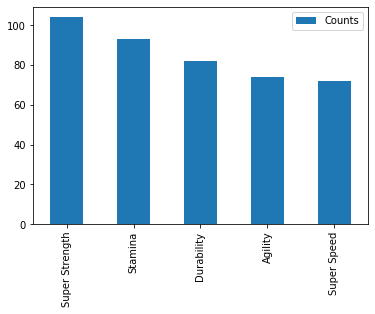

In [37]:
dc_counts_df = pd.DataFrame(dc_dict, index=['Counts'])
dc_counts_df = dc_counts_df.T

dc_counts_df.sort_values('Counts', ascending=False).head().plot(kind='bar')

Text(0.5, 1.0, 'DC')

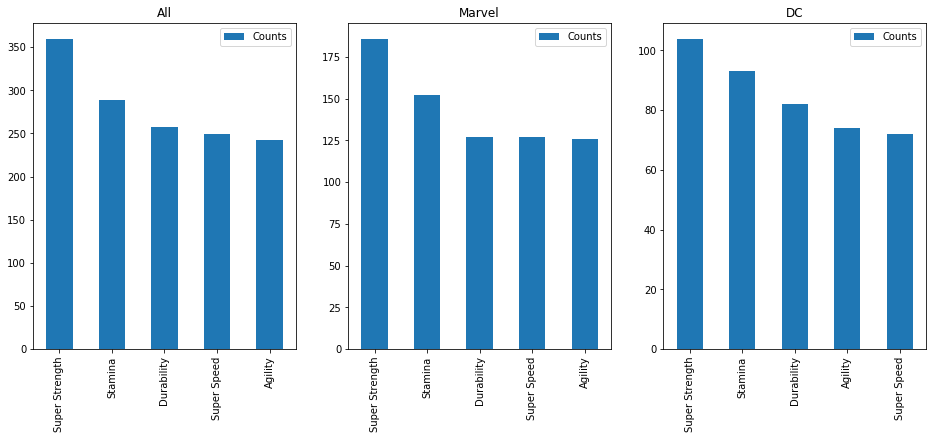

In [38]:
fig = plt.figure(figsize=(16,6))

ax1 = plt.subplot(1,3,1)
count_df.sort_values('Counts', ascending=False).head().plot(kind='bar', ax=ax1)
plt.title('All')

ax2 = plt.subplot(1,3,2)
marvel_counts_df.sort_values('Counts', ascending=False).head().plot(kind='bar', ax=ax2)
plt.title('Marvel')

ax3 = plt.subplot(1,3,3)
dc_counts_df.sort_values('Counts', ascending=False).head().plot(kind='bar', ax=ax3)
plt.title('DC')

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________

The top powers are basically the same for all superhores.
Overall the top 5 powers Super Strength, Stamina, Durability, Super Speed, and Agility.
Marvel top powers Super Strength, Stamina, Durability, Super Speed, and Agility.
DC top five powers Super Strength, Stamina, Durability, Agility, and Super Speed.

### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________
How is Flight distributed among male and femae super heroes?


Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [44]:
original_powers_df.rename(columns={'hero_names': 'name'}, inplace=True)
original_powers_df.head()

,name,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [45]:
heroes_and_powers_df2 = original_powers_df.set_index('name').join(heroes_df.set_index('name'), how='inner')
heroes_and_powers_df2.tail()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Yellowjacket II,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0
Ymir,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

In [62]:
male_flight_df = heroes_and_powers_df.loc[(heroes_and_powers_df['Gender'] == 'Male') & (heroes_and_powers_df['Flight'] == True)]
male_flight_df = male_flight_df.loc[:,['name','Gender', 'Flight']]
male_flight_df.reset_index()
male_flight_df.head()

,name,Gender,Flight
5,Absorbing Man,Male,True
11,Air-Walker,Male,True
13,Alan Scott,Male,True
18,Allan Quatermain,Male,True
21,Ando Masahashi,Male,True


In [63]:
male_count = male_flight_df['Flight'].count()
male_count

147

In [64]:
female_flight_df = heroes_and_powers_df.loc[(heroes_and_powers_df['Gender'] == 'Female') & (heroes_and_powers_df['Flight'] == True)]
female_flight_df = female_flight_df.loc[:,['name', 'Gender', 'Flight']]
female_flight_df.reset_index()
female_flight_df.head()

,name,Gender,Flight
8,Agent 13,Female,True
23,Angel Dust,Female,True
37,Arachne,Female,True
39,Arclight,Female,True
43,Armor,Female,True


In [65]:
female_count = female_flight_df['Flight'].count()
female_count

59

In [70]:
female_flight_df.dtypes

name      object
Gender    object
Flight      bool
dtype: object

In [71]:
df = pd.DataFrame({'Heroes':['Male', 'Female'], 'val':[147, 59]})

Text(0.5, 0, 'Hero Gender')

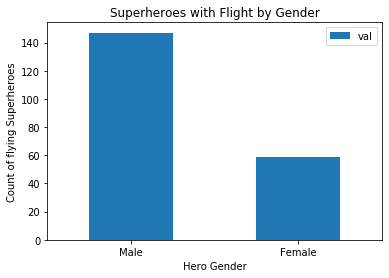

In [76]:
ax=df.plot.bar(x='Heroes', y='val', rot = 0)
plt.title('Superheroes with Flight by Gender')
plt.ylabel('Count of flying Superheroes')
plt.xlabel('Hero Gender')

In [ ]:
#It seems that flying superheros are more likely to 
#be male than female.  However I should look at the 
#percentage of females that fly vs the percentage of 
#males that fly to get a better understanding.


## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data